# Quantitative Biology and Biophysics (AS.020.674/618)	Spring 2024
## Lab 3: Gordus 
## February 23, 2024

# II.1 Dipoles

II.1 Calculation of the dipole moment of adenine. Calculate the dipole moment of adenine (the x and y components, µx and µy, as well as the magnitude |µ|) and visualize it as a vector plotted on top of the adenine structure.

The tab-separated values file Adenine_qxy.txt contains the partial charges (in elementary charges, qe) and positions (in Å) for all atoms in the adenine structure.

The contributions of the individual atoms are additive, so as discussed in class, we calculate the x and y components of the dipole moment according to

<img src="http://www.gordus.org/public_images/dipoles3.png" style="width: 300px;"/>


where qi is the partial charge of atom i and xi and yi are the coordinates of the atom. Adenine is planar, so we do not need the third (z) dimension here. 

<img src="http://www.gordus.org/public_images/adenine.png" style="width: 200px;"/>


The position of each atom is designated in a coordinate system with its origin at the H atom at position 9 and with the H-N9 bond parallel to the y-axis.

The charge values in the text file are net charge densities that already include the contributions of both the positive and negative charges at each atom position.

**The magnitude of the dipole moment has dimensions of charge*distance. In SI units, the charge is expressed in coulombs (C) and the length in meters (m). A special unit, the debye (D), has been defined for dipole moments.**

**To convert the units used in the table (elementary charge, qe, and Å) to debye (D), multiply with 4.803:
 D =  4.803 * qe Å**

Import Adenine_qxy.txt as a pandas dataframe to calculate the dipole moment. The headers are: Atom, Element, qi, xi, yi


In [6]:
# These are the libraries you will need for this lab

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re # This is very useful for matching strings using re.search(string,var)


# <font color='red'>Student Input Cell: 2 points</font>   

In [7]:
# Import Data, as a pandas dataframe
filename  = '/Users/cmdb/Desktop/QBIO2_lab/lab_3/Adenine_qxy.txt'

# The headers are: Atom, Element, qi, xi, yi
df = pd.read_csv(filename, sep="\t", header = 0)
print(df.head())

  Atom Element    qi     xi     yi
0   N1       N -0.52 -2.791  3.937
1   C2       C  0.31 -3.201  2.664
2   N3       N -0.51 -2.391  1.608
3   C4       C  0.33 -1.079  1.828
4   C5       C  0.12 -0.604  3.113


##  II.1a Calculate the dipole moment & magnitude

This will require accesssing data from the DataFrame `df`.

If you want to access a column of data from the DataFrame table, you can use its header name. For example, if you want to access the column of Atoms, you would use:

`df.Atom`


# <font color='red'>Student Input Cell: 4 points</font> 

In [14]:
# Calculate the dipole moment along each axis
dm_x_axis = np.nansum(df['qi'] * df['xi'])
dm_y_axis = np.nansum(df['qi'] * df['yi'])

# convert units of e*A to Debye 
dm_x_axisD = dm_x_axis * 4.803
dm_y_axisD = dm_y_axis * 4.803

# Create a dipole vector
DP_vector = np.array([dm_x_axisD, dm_y_axisD])

# Calculate the magnitude of the vector
DP_vector_magnitude = np.sqrt((dm_x_axisD**2)+(dm_y_axisD**2))

# Print dipole magnitude
print("The magnitude of the dipole is: " + str(DP_vector_magnitude))

The magnitude of the dipole is: 3.256753279003802


##  II.1b Plot the atomic coordinates for adenine. Make sure the aspect ratio for both axes are equal.

### Hydrogen: white
### Carbon: black
### Nigrogen: blue

### re.match

This will require you use the `re.match` function to string-match from your table of data in `df`. The output from this function is an object, but all you really care about is if you were successful or not, so if you wrap this in a `bool()` function, you will return a `True` if there is a match, and a `False` if there is no match.

For example, try executing the following:

`name = 'Andrew'`

`match = bool(re.match('A',name))` # returns true or false, "if it is Nitrogen, then I want to plot it in blue

`print(match)`

`match = bool(re.match('Z',name))`

`print(match)`


### plt.arrow()

To draw the dipole moment, use the `plt.arrow` function:

`plt.arrow(x,y,dx, dy,head_width = 0.1)` # dx and dy is the length of the arrow

For `x,y` (the anchor of the arrow), use `0,0`.

### plt.axis('scaled')
To ensure your plot is scaled correctly, please use:

`plt.axis('scaled')`

# <font color='red'>Student Input Cell: 4 points</font> 

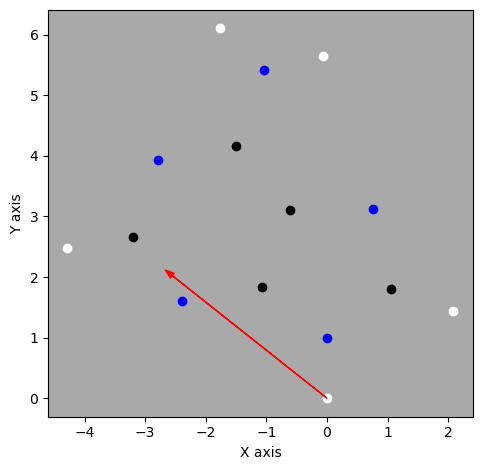

In [29]:
# Plot the atomic coordinates for adenine. Make sure the aspect ratio for both axes are equal.

# Hydrogen: white
# Carbon: black
# Nitrogen: blue

def match_color(thang):
    if re.match("N", thang):
        return 'blue'
    if re.match("C", thang):
        return 'black'
    if re.match("H", thang):
        return 'white'

x_axis = df['xi']
y_axis = df['yi']

for index,row in df.iterrows():
    plt.scatter(row['xi'], row['yi'], color = match_color(row['Element']))

plt.gca().set_facecolor('darkgrey')
plt.arrow(0,0, -dm_x_axisD, -dm_y_axisD, head_width = 0.1, color = 'red')

plt.xlabel("X axis")
plt.ylabel("Y axis")

plt.axis('scaled')

plt.tight_layout()
plt.show()


# II.3 Dipole-Dipole vs. Ion-Ion interactions

Plot the energies for a dipole-dipole and for an ion-ion interaction as a function of distance from 3 to 10 Å such that their magnitudes are 1 at r = 3 Å. How does the distance dependence compare for the two types of interactions?


# <font color='red'>Student Input Cell: 5 points</font> 

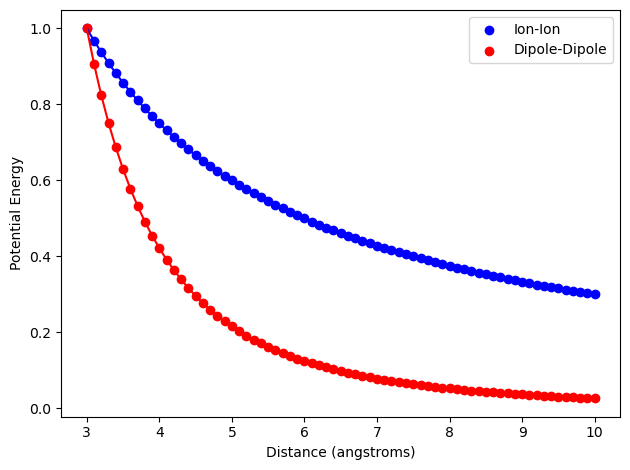

In [37]:
# Plot energies of ion-ion and dipole-dipole interactions vs. distance

# In the equations for charge-charge and dipole-dipole interactions, 
# we can combine all the terms execpt r into one parameter and get
# Ui(r) = A/r for ion-ion interactions and
# Ud (r) = B/r^3 for dipole-dipole interactions

# The energies at r = 3 A are 1 if
# Ui(3) = Ud(3) = 1, 
# so 1 = A/3 = B/27 (we do not worry about units here).

# set values for A and B
A = 3
B = 27

# create a distance vector from 3 to 10; with step size 0.1
distance = np.arange(3,10.1, 0.1)
PE_II = (A/distance)
PE_DD = (B/distance**3)
# plot the potential energies from 3 to 10 Angstroms
plt.scatter(distance, PE_II, color = 'blue', label = 'Ion-Ion')
plt.plot(distance, PE_II, color = 'blue')
plt.scatter(distance, PE_DD, color = 'red', label = 'Dipole-Dipole')
plt.plot(distance, PE_DD, color = 'red')

plt.xlabel("Distance (Angstroms)")
plt.ylabel("Potential Energy")
plt.legend()

plt.tight_layout()
plt.show()